## Importing all the necessary python libraries required for the Project

In [8]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


## Reading the DataSet


In [24]:
# dataset contains data from JAN 2022 - NOV 2024    
adc = pd.read_csv("Airline_Delay_Cause.csv")
adc

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,11,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",82.0,15.0,7.72,0.0,...,0.0,3.89,0.0,0.0,550.0,301.0,0.0,107.0,0.0,142.0
1,2024,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",8.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",82.0,10.0,5.05,1.0,...,0.0,2.49,0.0,2.0,559.0,298.0,55.0,48.0,0.0,158.0
3,2024,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",75.0,3.0,2.00,0.0,...,0.0,1.00,0.0,0.0,93.0,73.0,0.0,0.0,0.0,20.0
4,2024,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",91.0,10.0,2.53,0.0,...,0.0,3.61,0.0,0.0,406.0,196.0,0.0,110.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66263,2022,1,ZW,Air Wisconsin Airlines Corp,STL,"St. Louis, MO: St Louis Lambert International",6.0,1.0,0.29,0.0,...,0.0,0.39,1.0,0.0,85.0,25.0,0.0,27.0,0.0,33.0
66264,2022,1,ZW,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY: Syracuse Hancock International",40.0,7.0,2.02,1.1,...,0.0,2.98,3.0,0.0,746.0,48.0,122.0,52.0,0.0,524.0
66265,2022,1,ZW,Air Wisconsin Airlines Corp,TUL,"Tulsa, OK: Tulsa International",8.0,1.0,0.00,0.0,...,0.0,0.30,1.0,0.0,46.0,0.0,0.0,32.0,0.0,14.0
66266,2022,1,ZW,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI: Cherry Capital",59.0,11.0,2.60,0.0,...,0.0,2.91,3.0,0.0,527.0,138.0,0.0,225.0,0.0,164.0


In [25]:
adc.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,66268.000000,66268.000000,66189.000000,66161.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000,66189.000000
mean,2022.965579,6.330612,320.404765,64.832892,22.196344,2.336308,16.734352,0.188840,23.349573,5.775340,0.778664,4527.160842,1654.734865,256.399205,808.987309,8.719394,1798.287253
std,0.810845,3.371007,925.317186,185.782458,57.121457,8.456920,54.219879,0.844965,76.914725,27.353597,3.476008,14757.015436,5392.381271,1024.864352,2963.750769,45.268510,6442.762326
min,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,3.000000,39.000000,6.000000,2.070000,0.000000,1.000000,0.000000,1.140000,0.000000,0.000000,340.000000,107.000000,0.000000,29.000000,0.000000,66.000000
50%,2023.000000,6.000000,87.000000,16.000000,6.090000,0.360000,3.230000,0.000000,4.550000,1.000000,0.000000,1011.000000,369.000000,17.000000,127.000000,0.000000,311.000000
75%,2024.000000,9.000000,210.000000,44.000000,17.280000,1.850000,9.820000,0.000000,14.340000,3.000000,1.000000,2919.000000,1178.000000,158.000000,423.000000,0.000000,1105.000000
max,2024.000000,12.000000,20679.000000,5544.000000,1886.580000,325.410000,1685.740000,58.690000,2588.130000,1565.000000,192.000000,648300.000000,321792.000000,64550.000000,139958.000000,3551.000000,279153.000000


In [26]:
adc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66268 entries, 0 to 66267
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 66268 non-null  int64  
 1   month                66268 non-null  int64  
 2   carrier              66268 non-null  object 
 3   carrier_name         66268 non-null  object 
 4   airport              66268 non-null  object 
 5   airport_name         66268 non-null  object 
 6   arr_flights          66189 non-null  float64
 7   arr_del15            66161 non-null  float64
 8   carrier_ct           66189 non-null  float64
 9   weather_ct           66189 non-null  float64
 10  nas_ct               66189 non-null  float64
 11  security_ct          66189 non-null  float64
 12  late_aircraft_ct     66189 non-null  float64
 13  arr_cancelled        66189 non-null  float64
 14  arr_diverted         66189 non-null  float64
 15  arr_delay            66189 non-null 

In [27]:
adc.isna()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
rows_with_nulls = adc[adc.isnull().any(axis=1)]

print(rows_with_nulls)



       year  month carrier                             carrier_name airport  \
379    2024     11      C5            CommuteAir LLC dba CommuteAir     DAY   
3057   2024     10      C5            CommuteAir LLC dba CommuteAir     PVD   
4529   2024      9      G7  GoJet Airlines LLC d/b/a United Express     HHH   
4606   2024      9      MQ                                Envoy Air     CAE   
5243   2024      9      UA                 United Air Lines Network     EGE   
...     ...    ...     ...                                      ...     ...   
66037  2022      1      YV                       Mesa Airlines Inc.     BOS   
66038  2022      1      YV                       Mesa Airlines Inc.     BTV   
66039  2022      1      YV                       Mesa Airlines Inc.     BUF   
66153  2022      1      YX                         Republic Airline     GRB   
66222  2022      1      ZW              Air Wisconsin Airlines Corp     DSM   

                                            airport

In [29]:
adc = adc.dropna()

In [30]:
adc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66161 entries, 0 to 66267
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 66161 non-null  int64  
 1   month                66161 non-null  int64  
 2   carrier              66161 non-null  object 
 3   carrier_name         66161 non-null  object 
 4   airport              66161 non-null  object 
 5   airport_name         66161 non-null  object 
 6   arr_flights          66161 non-null  float64
 7   arr_del15            66161 non-null  float64
 8   carrier_ct           66161 non-null  float64
 9   weather_ct           66161 non-null  float64
 10  nas_ct               66161 non-null  float64
 11  security_ct          66161 non-null  float64
 12  late_aircraft_ct     66161 non-null  float64
 13  arr_cancelled        66161 non-null  float64
 14  arr_diverted         66161 non-null  float64
 15  arr_delay            66161 non-null  floa

In [32]:
# Filter rows where arr_delay is greater than 100,000
high_delay_rows = adc[adc["arr_delay"] > 100000]

# Display the filtered rows
print(high_delay_rows)


       year  month carrier               carrier_name airport  \
130    2024     11      AA  American Airlines Network     DFW   
420    2024     11      DL    Delta Air Lines Network     ATL   
1506   2024     11      UA   United Air Lines Network     EWR   
2768   2024     10      AA  American Airlines Network     CLT   
2774   2024     10      AA  American Airlines Network     DFW   
...     ...    ...     ...                        ...     ...   
63712  2022      2      OO      SkyWest Airlines Inc.     ORD   
64469  2022      1      AA  American Airlines Network     DFW   
64655  2022      1      B6            JetBlue Airways     JFK   
64758  2022      1      DL    Delta Air Lines Network     ATL   
65526  2022      1      OO      SkyWest Airlines Inc.     DEN   

                                            airport_name  arr_flights  \
130    Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...      13090.0   
420    Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      18551.0   


In [33]:
high_delay_rows.to_csv("full_dataset.csv", index=False)


## Data Visualization

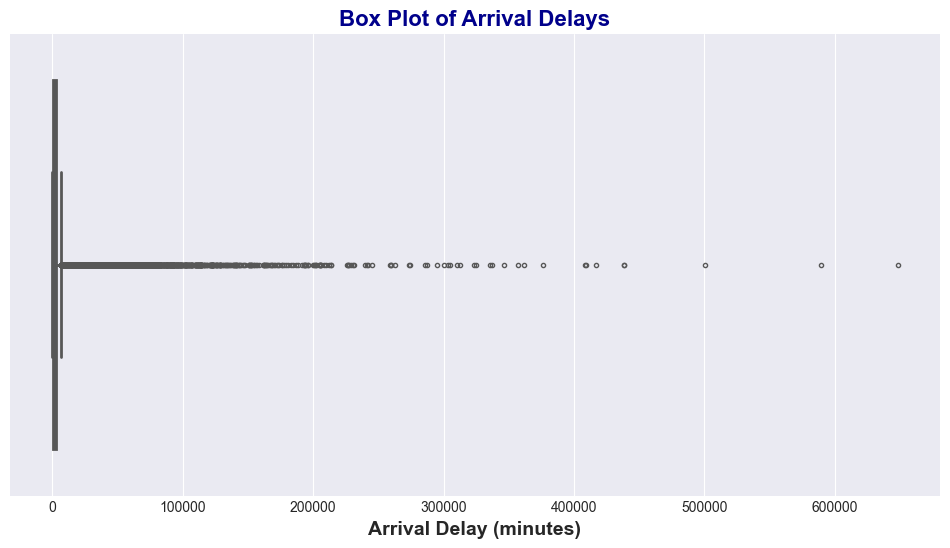

In [31]:
# Set theme
plt.style.use("seaborn-v0_8-darkgrid")

# Create figure
plt.figure(figsize=(12, 6))

# Plot boxplot
sns.boxplot(x=adc["arr_delay"], color="royalblue", fliersize=3, linewidth=2)

# Titles and labels
plt.title("Box Plot of Arrival Delays", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Arrival Delay (minutes)", fontsize=14, fontweight="bold")

# Show plot
plt.show()


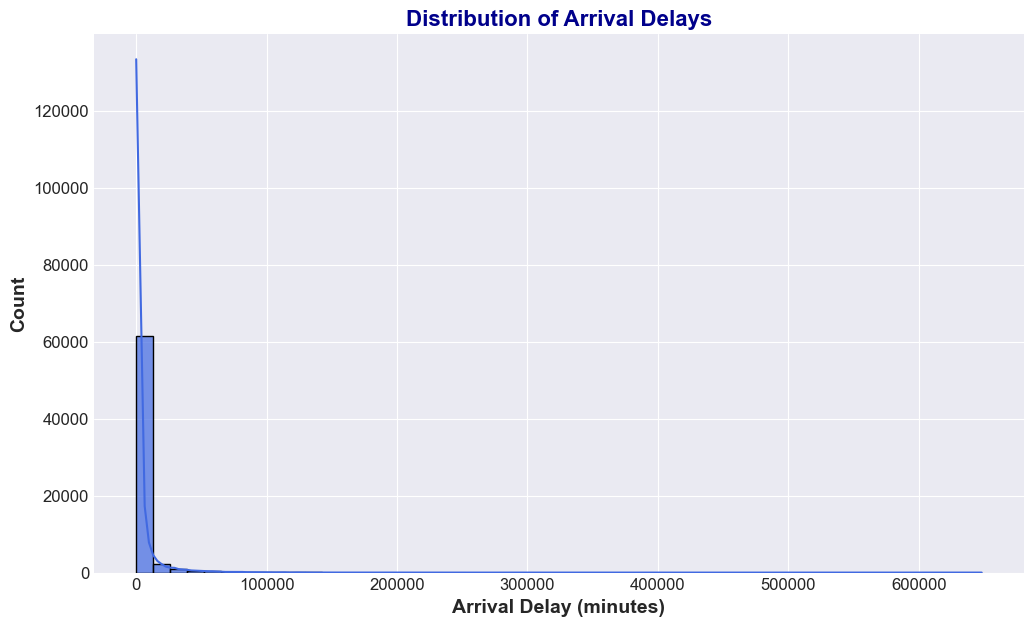

In [23]:
# Flight Delays

plt.style.use("seaborn-v0_8-darkgrid") #better Aesthetics

plt.figure(figsize=(12, 7))
sns.histplot(adc["arr_delay"].dropna(), bins=50, kde=True, color="royalblue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Arrival Delays", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Arrival Delay (minutes)", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


C:\Users\Utkarsh Singh\AppData\Local\Temp\ipykernel_33700\2626959968.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_airline.index, y=delay_by_airline.values, palette="Reds_r")


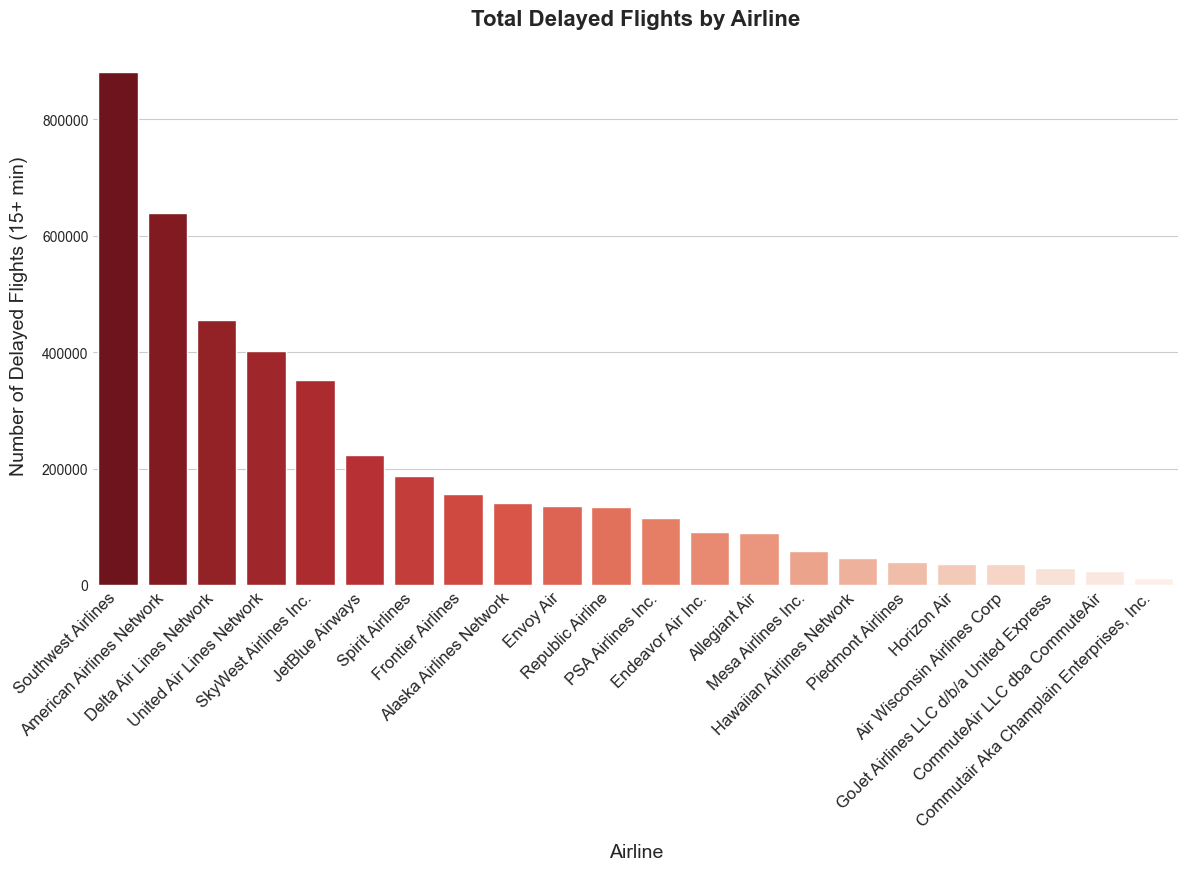

In [34]:
# Top Airlines With most Delays

import matplotlib.pyplot as plt
import seaborn as sns

delay_by_airline = adc.groupby("carrier_name")["arr_del15"].sum().sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

sns.barplot(x=delay_by_airline.index, y=delay_by_airline.values, palette="Reds_r")
plt.title("Total Delayed Flights by Airline", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Airline", fontsize=14, labelpad=10)
plt.ylabel("Number of Delayed Flights (15+ min)", fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.show()



C:\Users\Utkarsh Singh\AppData\Local\Temp\ipykernel_33700\1478139078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adc['date'] = pd.to_datetime(adc[['year', 'month']].assign(day=1))


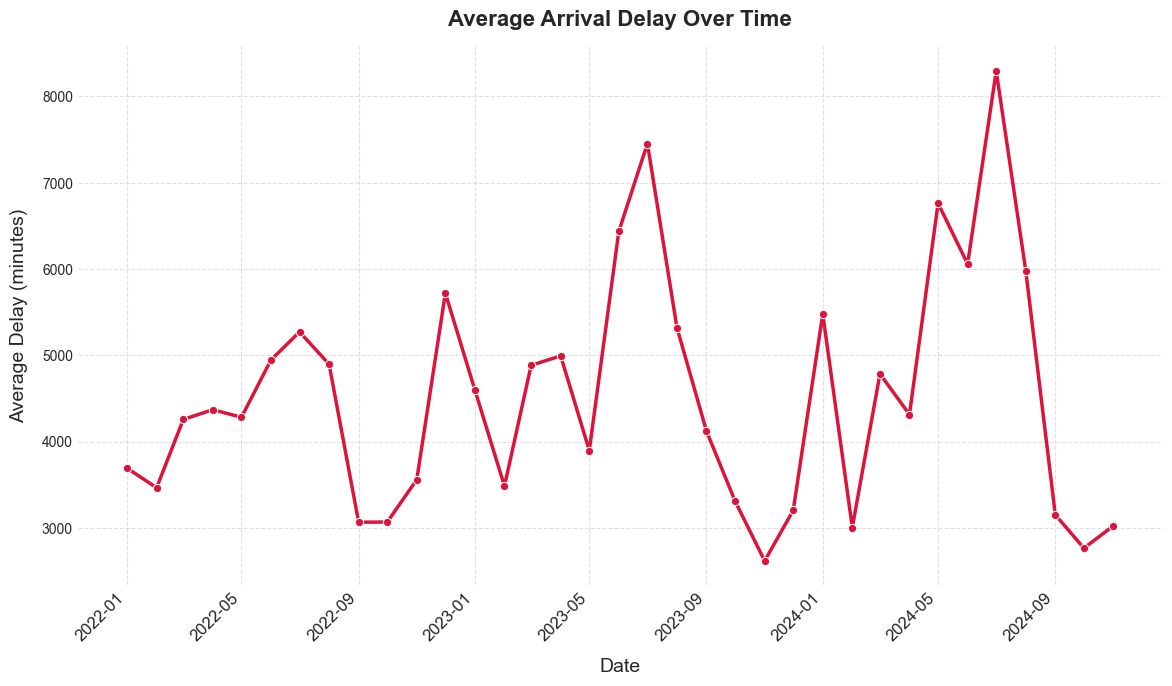

In [35]:
# Delay trends over time 

adc['date'] = pd.to_datetime(adc[['year', 'month']].assign(day=1))  

delay_trends = adc.groupby("date")["arr_delay"].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))


sns.lineplot(x=delay_trends.index, y=delay_trends.values, marker="o", linewidth=2.5, color="crimson")
plt.title("Average Arrival Delay Over Time", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("Average Delay (minutes)", fontsize=14, labelpad=10)

# Format x-axis for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)

sns.despine()
plt.show()


C:\Users\Utkarsh Singh\AppData\Local\Temp\ipykernel_33700\4042177890.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delays.index, y=avg_delays.values, palette=colors)


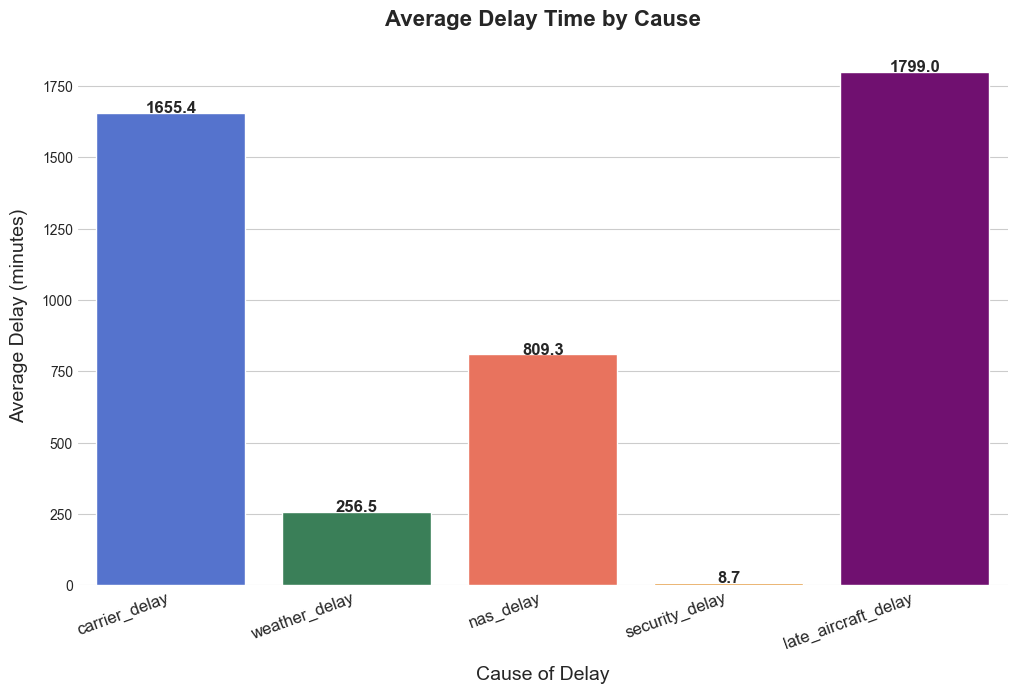

In [36]:
# Impact of Different Delay Causes
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for a modern look
sns.set_style("whitegrid")

# Define delay causes
cause_columns = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Calculate mean delays for each cause
avg_delays = adc[cause_columns].mean()

# Define color palette
colors = ["royalblue", "seagreen", "tomato", "darkorange", "purple"]

# Create figure
plt.figure(figsize=(12, 7))

# Create bar plot
sns.barplot(x=avg_delays.index, y=avg_delays.values, palette=colors)

# Titles and labels
plt.title("Average Delay Time by Cause", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Cause of Delay", fontsize=14, labelpad=10)
plt.ylabel("Average Delay (minutes)", fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=20, ha="right", fontsize=12)

# Add value labels on top of bars
for index, value in enumerate(avg_delays.values):
    plt.text(index, value + 1, f"{value:.1f}", ha="center", fontsize=12, fontweight="bold")

# Remove top and right borders for a cleaner look
sns.despine()

# Show plot
plt.show()


C:\Users\Utkarsh Singh\AppData\Local\Temp\ipykernel_33700\3030133389.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_airport.index, y=delay_by_airport.values, palette="Purples_r")


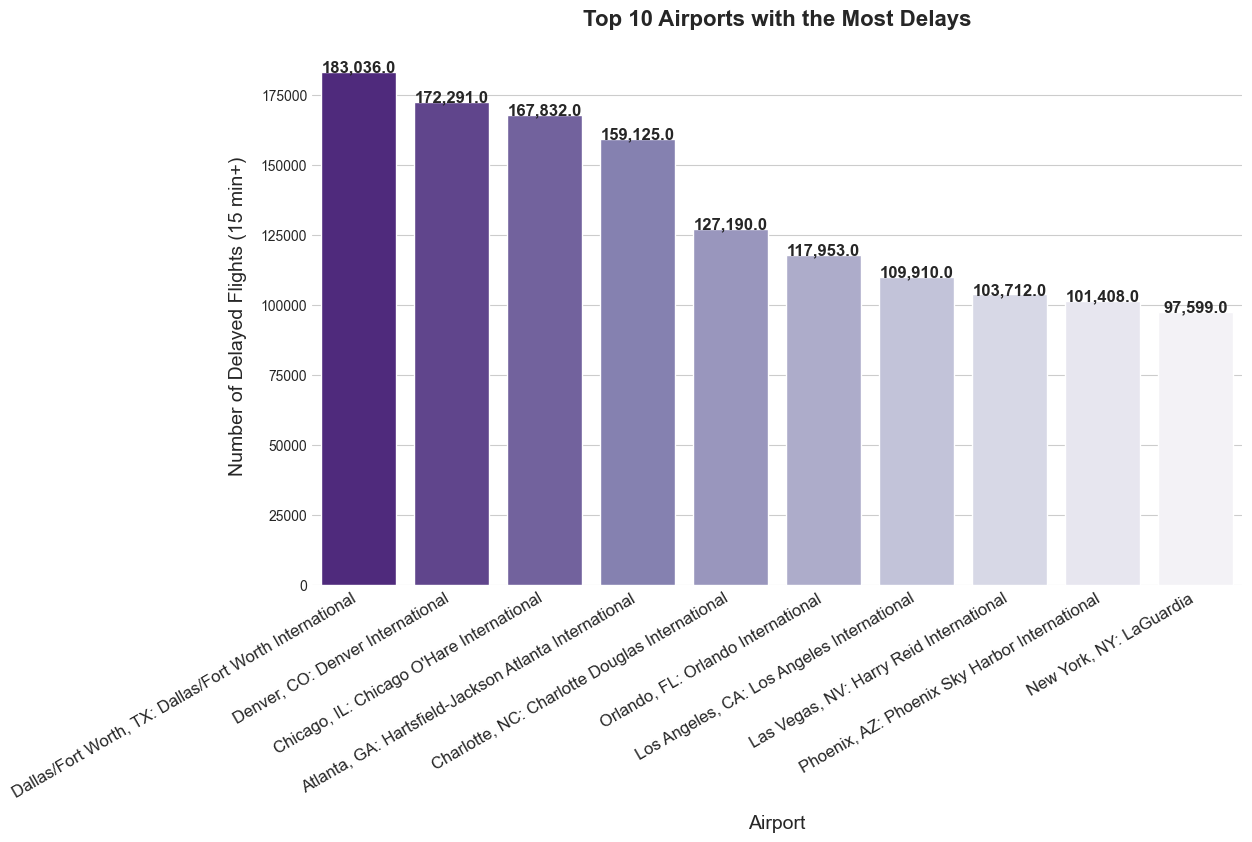

In [ ]:
#Airports with the Most Delays

sns.set_style("whitegrid")

# Get top 10 airports with the most delays
delay_by_airport = adc.groupby("airport_name")["arr_del15"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=delay_by_airport.index, y=delay_by_airport.values, palette="Purples_r")
plt.title("Top 10 Airports with the Most Delays", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Airport", fontsize=14, labelpad=10)
plt.ylabel("Number of Delayed Flights (15 min+)", fontsize=14, labelpad=10)

plt.xticks(rotation=30, ha="right", fontsize=12)
for index, value in enumerate(delay_by_airport.values):
    plt.text(index, value + 50, f"{value:,}", ha="center", fontsize=12, fontweight="bold")

sns.despine()
plt.show()



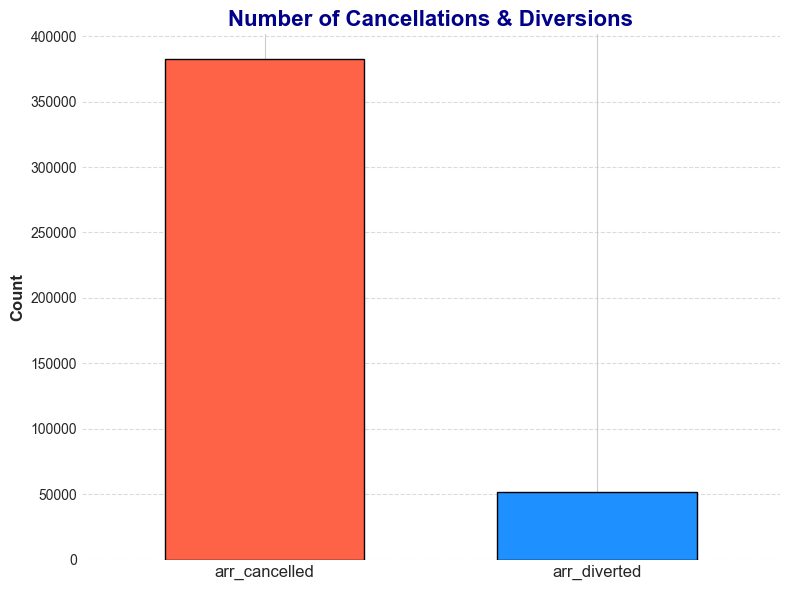

In [38]:
# Flight Cancellations & Diversions

cancel_divert = adc[["arr_cancelled", "arr_diverted"]].sum()
plt.figure(figsize=(8, 6))
cancel_divert.plot(kind="bar", color=["#ff6347", "#1e90ff"], width=0.6, edgecolor='black')
plt.title("Number of Cancellations & Diversions", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


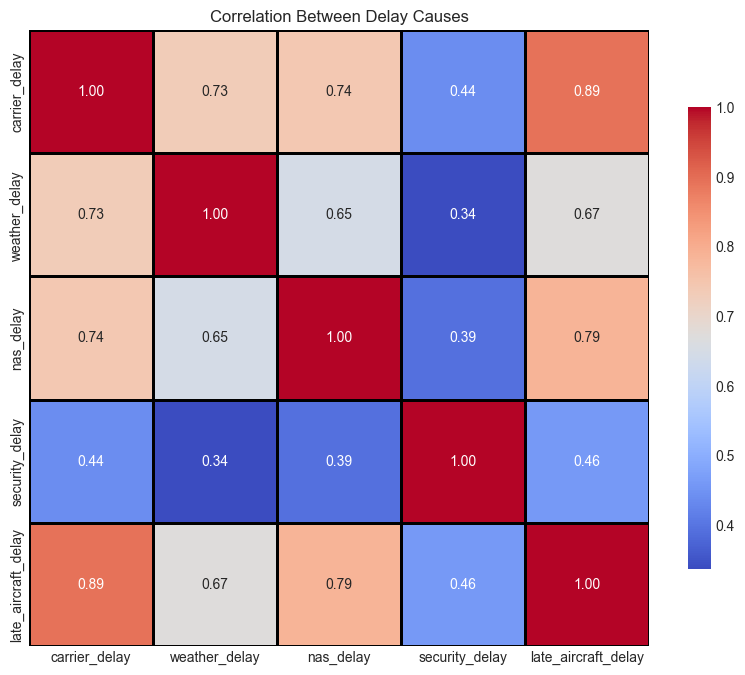

In [39]:
#Correlation Between Delay Causes
plt.figure(figsize=(10,8))
sns.heatmap(adc[cause_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', cbar_kws={'shrink': 0.75})

plt.title("Correlation Between Delay Causes")
plt.show()


## Adding Column for Causal Inference